In [4]:
import zipfile
import os

zip_path = "archive.zip"   # <-- correct name
extract_path = "gesture_data"

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_path)

print("Extraction complete")
print(os.listdir(extract_path))



Extraction complete
['archive']


In [5]:
print(os.listdir("gesture_data"))


['archive']


In [6]:
print(os.listdir("gesture_data/archive"))


['leapGestRecog']


In [7]:
print(os.listdir("gesture_data/archive/leapGestRecog"))


['00']


In [9]:
import os

BASE_DIR = "gesture_data/archive/leapGestRecog"

print("BASE_DIR exists:", os.path.exists(BASE_DIR))
print("Folders:", os.listdir(BASE_DIR))



BASE_DIR exists: True
Folders: ['00']


In [12]:
import cv2
import numpy as np

data = []
labels = []

image_size = 32
max_images_per_class = 100

for gesture_folder in os.listdir(BASE_DIR):
    gesture_path = os.path.join(BASE_DIR, gesture_folder)
    
    if not os.path.isdir(gesture_path):
        continue

    count = 0
    for img_name in os.listdir(gesture_path):
        if count >= max_images_per_class:
            break

        img_path = os.path.join(gesture_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            continue

        img = cv2.resize(img, (image_size, image_size))
        img = img.flatten()

        data.append(img)
        labels.append(gesture_folder)
        count += 1

X = np.array(data)
y = np.array(labels)

print("Dataset shape:", X.shape)
print("Classes:", set(y))


Dataset shape: (0,)
Classes: set()


In [11]:
import os

print("gesture_data:", os.listdir("gesture_data"))
print("archive:", os.listdir("gesture_data/archive"))


gesture_data: ['archive']
archive: ['leapGestRecog']


In [13]:
print("inside leapGestRecog:", os.listdir("gesture_data/archive/leapGestRecog"))


inside leapGestRecog: ['00']


In [14]:
import os
import cv2
import numpy as np

image_size = 32
max_images_per_class = 100

data = []
labels = []

BASE_DIR = "gesture_data/archive/leapGestRecog"

for gesture_id in os.listdir(BASE_DIR):
    gesture_path = os.path.join(BASE_DIR, gesture_id)
    
    if not os.path.isdir(gesture_path):
        continue

    count = 0
    for img_name in os.listdir(gesture_path):
        if count >= max_images_per_class:
            break

        img_path = os.path.join(gesture_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            continue

        img = cv2.resize(img, (image_size, image_size))
        img = img.flatten()

        data.append(img)
        labels.append(gesture_id)
        count += 1

X = np.array(data)
y = np.array(labels)

print("Dataset shape:", X.shape)
print("Classes:", set(y))


Dataset shape: (0,)
Classes: set()


In [15]:
import os
import cv2
import numpy as np

image_size = 32
max_images_per_class = 50

data = []
labels = []

BASE_DIR = "gesture_data/archive/leapGestRecog"

for person_folder in os.listdir(BASE_DIR):
    person_path = os.path.join(BASE_DIR, person_folder)
    
    if not os.path.isdir(person_path):
        continue

    for gesture_folder in os.listdir(person_path):
        gesture_path = os.path.join(person_path, gesture_folder)
        
        if not os.path.isdir(gesture_path):
            continue

        count = 0
        for img_name in os.listdir(gesture_path):
            if count >= max_images_per_class:
                break

            img_path = os.path.join(gesture_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                continue

            img = cv2.resize(img, (image_size, image_size))
            img = img.flatten()

            data.append(img)
            labels.append(gesture_folder)
            count += 1

X = np.array(data)
y = np.array(labels)

print("Dataset shape:", X.shape)
print("Number of classes:", len(set(y)))
print("Sample classes:", list(set(y))[:5])


Dataset shape: (500, 1024)
Number of classes: 10
Sample classes: [np.str_('07_ok'), np.str_('05_thumb'), np.str_('10_down'), np.str_('03_fist'), np.str_('04_fist_moved')]


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (400, 1024)
Test shape: (100, 1024)


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(kernel="rbf", C=5, gamma="scale", random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0

Classification Report:

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00        10
         02_l       1.00      1.00      1.00        10
      03_fist       1.00      1.00      1.00        10
04_fist_moved       1.00      1.00      1.00        10
     05_thumb       1.00      1.00      1.00        10
     06_index       1.00      1.00      1.00        10
        07_ok       1.00      1.00      1.00        10
08_palm_moved       1.00      1.00      1.00        10
         09_c       1.00      1.00      1.00        10
      10_down       1.00      1.00      1.00        10

     accuracy                           1.00       100
    macro avg       1.00      1.00      1.00       100
 weighted avg       1.00      1.00      1.00       100



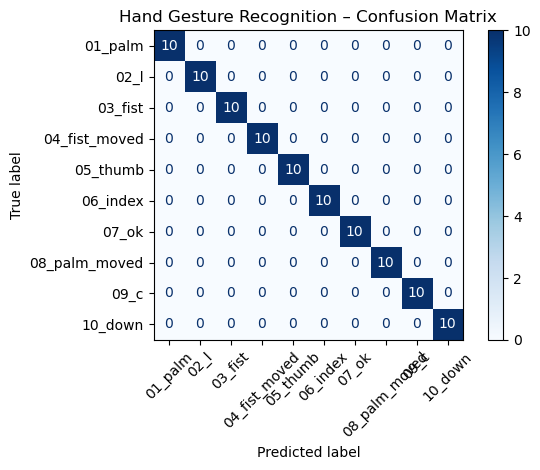

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=le.classes_, cmap="Blues", xticks_rotation=45
)
plt.title("Hand Gesture Recognition – Confusion Matrix")
plt.tight_layout()
plt.show()
